# 서로소 집합 자료구조
* 서로소 부분 집합들로 나누어진 원소들로 데이터를 처리하기 위한 자료구조입니다.
* 서로소 집합 자료구조는 두 종류의 연산을 지원합니다.
    * 합집합(Union) : 두 개의 원소가 포함된 집합을 하나의 집합으로 합치는 연산
    * 찾기(Find) : 특정한 원소가 속한 집합이 어떤 집합인지 알려주는 연산
* 서로소 집합 자료구조는 합치기 찾기(Union Find) 자료구조라고 불리기도 합니다.


* 여러 개의 합치기 연산이 주어졌을 떄 서로소 집합 자료구조의 동작 과정은 다음과 같습니다.
    * 합집합 연산을 확인하여, 서로 연결된 두 노드 A, B를 확인합니다.
    
        1) A와 B의 루트 노드 A', B'를 각각 찾습니다.
        
        2) A', B'의 부모 노드로 설정합니다.
        
    * 모든 합집합 연산을 처리할 때 까지 1번의 과정을 반복합니다.
    
        
        
     

## 서로소 집합 자료구조 : 연결성
* 기본적인 형태의 서로소 집합 자료구조에서는 루트 노드에 즉시 접근할 수 없습니다.
    * 루트 노드를 찾기 위해 부모 테이블을 계속해서 확인하며 거슬러 올라가야 합니다.

### 서로소 집합 자료구조(Python 구현)

In [ ]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent,x):
    # 루트 노드를 찾을 때까지 재귀 호출
    if parent[x] != x:
        return find_parent(parent,parent[x])
    return x

# 두 원소가 속한 집합을 합치기
def union_parent(parent,a,b):
    a = find_parent(parent,a)
    b = find_parent(parent,b)
    if a<b:
        parent[b] = a
    else:
        parent[a] = b
           

In [ ]:
# 노드의 개수와 간선(Union 연산)의 개수 입력 받기
v, e = map(int,input().split())
parent = [0]*(v+1) # 부모 테이블 초기화

# 부모 테이블상에서 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i
    
# Union 연산을 각각 수행
for i in range(e):
    a, b = map(int, input().split())
    union_parent(parent,a,b)

# 각 원소가 속한 집합 출력하기
print("각 원소가 속한 집합: ",end = '')
for i in range(1, v + 1):
    print(find_parent(parent, i),end = '')

print()

# 부모 테이블 내용 출력하기
print("부모 테이블: ",end = '')
for i in range(1, v+1):
    print(parent[i],end ='')

## 서로소 집합 자료구조: 기본적인 구현 방법의 문제점
* 합집합 연산이 편향되게 이루어지는 경우 찾기 함수가 비효율적으로 동작합니다.
* 최악의 경우에는 찾기 함수가 모든 노드를 다 확인하게 되어 시간 복잡도가 O(V)입니다.

## 서로소 집합 자료구조: 경로 압축
* 찾기 함수를 최적화하기 위한 방법으로 경로 압축(Path Compression)을 이용할 수 있습니다.
    * 찾기 함수를 재귀적으로 호출한 뒤에 부모 테이블 값을 바로 갱신합니다.


In [ ]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent,parent[x])
    return parent[x]

* 경로 압축 기법을 적용하면 각 노드에 대하여 찾기 함수를 호출한 이후에 해당 노드의 루트 노드가 바로 부모 노드가 됩니다.
* 동일한 예시에 대해서 모든 합집합(Union) 함수를 처리한 후 각 원소에 대하여 찾기 함수를 수행하면 다음과 같이 부모 테이블이 갱신됩니다.
* 기본적인 방법에 비하여 시간 복잡도가 개선됩니다.

# 서로소 집합을 활용한 사이클 판별
* 서로소 집합은 무방향 그래프 내에서의 사이클을 판별할 때 사용할 수 있습니다.
    * 참고로 방향 그래프에서의 사이클 여부는 DFS를 이용하여 판별할 수 있습니다.
* 사이클 판별 알고리즘은 다음과 같습니다.
    * 1. 각 간선을 하나씩 확인하며 두 노드의 루트 노드를 확인합니다.
        * 1) 루트 노드가 서로 다르다면 두 노드에 대하여 합집합 연산을 수행합니다.
        * 2) 루트 노드가 서로 같다면 사이클(cycle)이 발생한 것입니다.
    * 2. 그래프에 포함되어 있는 모든 간선에 대하여 1번 과정을 반복합니다.

In [ ]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent,x):
    # 루트 노드를 찾을 때까지 재귀 호출
    if parent[x] != x:
        parent[x] = find_parent(parent,parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent,a,b):
    a = find_parent(parent,a)
    b = find_parent(parent,b)
    if a<b:
        parent[b] = a
    else:
        parent[a] = b

# 노드의 개수와 간선(Union 연산)의 개수 입력 받기
v, e = map(int,input().split())
parent = [0]*(v+1) # 부모 테이블 초기화

# 부모 테이블상에서 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i
    

for i in range(e):
    a, b = map(int, input().split())
    # 사이클이 발생한 경우 종료
    if find_parent(parent,a) == find_parent(parent,b):
        cycle = True
        break
    # 사이클이 발생하지 않았따면 합집합 연산 수행
    else:
        union_parent(parent,a,b)

if cycle:
    print("사이클 발생")
else:
    print("사이클이 발생하지 않음")



# 신장 트리
* 그래프에서 모든 노드를 포함하면서 사이클이 존재하지 않는 부분 그래프를 의미합니다.
    * 모든 노드가 포함되어 서로 연결되면서 사이클이 존재하지 않는다는 조건은 트리의 조건이기도 합니다.
    

## 최소 신장 트리
* 최소한의 비용으로 구성되는 신장 트리를 찾아야 할 때
* ex) N개의 도시가 존재하는 상황에서 두 도시 사이에 도로를 놓아 전체 도시가 서로 연결될 수 있게 도로를 설치하는 경우
    * 두 도시 A, B를 선택했을 때 A에서 B로 이동하는 경로가 반드시 존재하도록 도로를 설치합니다.
    

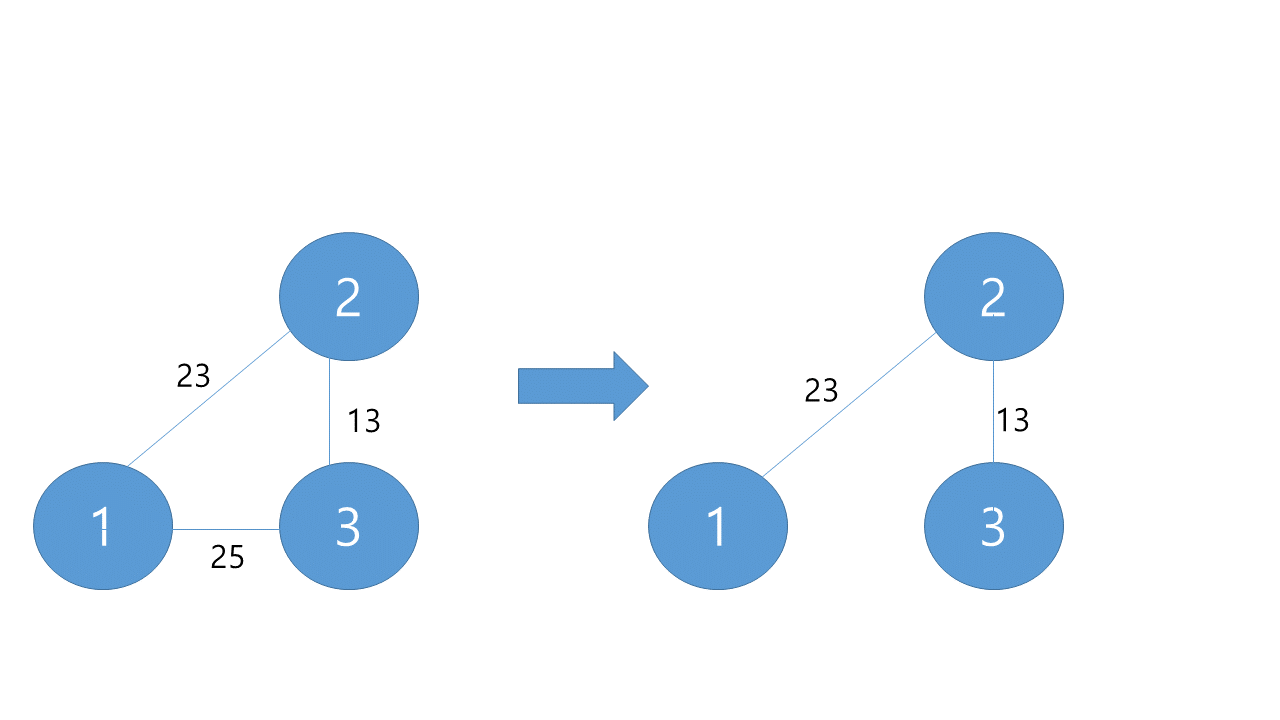

In [6]:
from IPython.display import Image
Image('C:/Users/Song/Desktop/MSstudy/cnn_image/tree.png')

## 크루스칼 알고리즘
* 대표적인 최소 신장 트리 알고리즘입니다.
* 그리디 알고리즘으로 분류됩니다.
* 구체적인 동작과정
    1. 간선 데이터를 비용에 따라 오름차순으로 정렬합니다.
    2. 간선을 하나씩 확인하며 현재의 간선이 사이클을 발생시키는지 확인합니다.
        * 사이클이 발생하지 않는 경우 최소 신장 트리에 포함시킵니다.
        * 사이클이 발생하는 경우 최소 신장 트리에 포함시키지 않습니다.
    3. 모든 간선에 대하여 2번의 과정을 반복합니다.

In [2]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent,x):
    # 루트 노드를 찾을 때까지 재귀 호출
    if parent[x] != x:
        parent[x] = find_parent(parent,parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent,a,b):
    a = find_parent(parent,a)
    b = find_parent(parent,b)
    if a<b:
        parent[b] = a
    else:
        parent[a] = b
        


In [5]:
# 노드의 개수와 간선의 개수 입력 받기
v, e = map(int,input().split())
parent = [0]*(v+1) # 부모 테이블 초기화

# 모든 간선을 담을 리스트와, 최종 비용을 담을 변수
edges = []
result = 0

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i

# 모든 간선에 대한 정보를 입력 받기
for _ in range(e):
    a, b, cost = map(int,input().split())
    # 비용순으로 정렬하기 위해서 튜플의 첫 번째 원소를 비용으로 설정
    edges.append((cost,a,b))
    
# 간선을 비용순으로 정렬
edges.sort()

for a in edges:
    print(a)

# 간선을 하나씩 확인
for edge in edges:
    cost, a, b = edge
    # 사이클이 발생하지 않는 경우에만 집합에 포함
    if find_parent(parent,a)!= find_parent(parent,b):
        union_parent(parent,a,b)
        result += cost
        
print(result)

7 9
1 2 29
1 5 75
2 3 35
2 6 34
3 4 7
4 6 23
4 7 13
5 6 53
6 7 25
(7, 3, 4)
(13, 4, 7)
(23, 4, 6)
(25, 6, 7)
(29, 1, 2)
(34, 2, 6)
(35, 2, 3)
(53, 5, 6)
(75, 1, 5)
159


## 크루스칼 알고리즘 성능 분석
* 크루스칼 알고리즘은 간선의 개수가 E개일 때,$ O(ElogE) $의 시간 복잡도를 가집니다.
* 크루스칼 알고리즘에서 가장 많은 시간을 요구하는 곳은 간선을 정렬을 수행하는 부분입니다.
    * 표준 라이브러리를 이용해 E개의 데이터를 정렬하기 위한 시간 복잡도는 $ O(ElogE) $입니다.

# 위상 정렬
* 사이클이 없는 방향 그래프의 모든 노드를 방향성에 거스르지 않도록 순서대로 나열하는 것을 의미합니다.


## 진입차수와 진출차수
* 진입차수 : 특정한 노드로 들어오는 간선의 개수
* 진출차수 : 특정한 노드에서 나가는 간선의 개수


## 위상 정렬 알고리즘
* 큐를 이용하는 위상 정렬 알고리즘의 동작 과정은 다음과 같습니다.
1. 진입차수가 0인 모든 노드를 큐에 넣는다.
2. 큐가 빌 때 까지 다음의 과정을 반복한다.

    1) 큐에서 원소를 꺼내 해당 노드에서 나가는 간선을 그래프에서 제거한다.
    
    2) 새롭게 진입차수가 0이 된 노드를 큐에 넣는다.

## 위상 정렬의 특징
* 위상 정렬은 DAG에 대해서만 수행할 수 있습니다.
    * DAG(Direct Acyclic Graph): 순환하지 않는 방향 그래프
* 위상 정렬에서는 여러 가지 답이 존재할 수 있습니다.
    * 한 단계에서 큐에 새롭게 들어가는 원소가 2개 이상인 경우가 있따면 여러 가지 답이 존재합니다.
* 모든 원소를 방문하기 전에 큐가 빈다면 사이클이 존재한다고 판단할 수 있습니다.
    * 사이클에 포함된 원소 중에서 어떠한 원소도 큐에 들어가지 못합니다.
* 스택을 활용한 DFS를 이용해 위상 정렬을 수행할 수도 있습니다.

In [ ]:
from collections import deque

# 노드의 개수와 간선의 개수 입력 받기
v, e = map(int,input().split())
# 모든 노드에 대한 진입차수는 0으로 초기화
indegree = [0]*(v + 1)
# 각 노드에 연결된 간선 정보를 담기 위한 연결 리스트 초기화
graph = [[]for i in range(v+1)]

# 방향 그래프의 모든 간선 정보를 입력 받기
for _ in range(e):
    a, b = map(int, input().split())
    graph[a].append(b) # 정점 A에서 B로 이동 가능
    # 진입 차수를 1 증가
    indegree[b] += 1

    
# 위상 정렬 함수
def topology_sort():
    result = []# 알고리즘 수행 결과를 담을 리스트
    q = deque() # 큐 기능을 위한 deque 라이브러리 사용
    # 처음 시작할 때는 진입차수가 0인 노드를 큐에 삽입
    for i in range(1, v+1):
        if indegree[i]==0:
            q.append(i)
    
    # 큐가 빌 때까지 반복
    while q:
        # 큐에서 원소 꺼내기
        now = q.popleft()
        result.append(now)
        # 해당 원소와 연결된 노드들의 진입차수에서 1 빼기
        for i in graph[now]:
            indegree[i] -= 1
            # 새롭게 진입차수가 0이 되는 노드를 큐에 삽입
            if indegree[i] == 0:
                q.append(i)
    # 위상 정렬을 수행한 결과 출력
    for i in result:
        print(i,end=' ')
        
topology_sort()